### 1. Problem statement
- This notebook implements a movie recommender system. 
- Recommender systems are used to suggest movies or songs to users based on their interest or usage history. 
- For example, Netflix recommends movies to watch based on the previous movies you've watched.  
- In this example, we will use Item-based Collaborative Filter 


- Dataset MovieLens: https://grouplens.org/datasets/movielens/100k/ 

### 2. Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 3. Data processing

In [2]:
movie_title_df = pd.read_csv('Movie_Id_Titles')

In [3]:
movie_title_df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
movie_rating_df = pd.read_csv('u.data', sep = '\t', names = ['user_id', 'item_id', 'rating', 'timestamp'])

In [5]:
movie_rating_df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


#### 3.1 Drop meaningless columns

In [6]:
movie_rating_df.drop(['timestamp'], axis = 1, inplace = True)

In [7]:
movie_rating_df.head(3)

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1


In [8]:
movie_rating_df.describe()

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


#### 3.2 Data quality check

In [9]:
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100003 non-null  int64
 1   item_id  100003 non-null  int64
 2   rating   100003 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


#### 3.3 Merge dataset

In [10]:
movie_rating_df = pd.merge(movie_rating_df, movie_title_df, on = 'item_id')

In [11]:
movie_rating_df.head()

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


In [12]:
movie_rating_df.shape

(100003, 4)

### 4. Analyse dataset

In [13]:
movie_rating_df.groupby(['title'])['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


#### 4.1 Analyse mean rating for each movie

In [14]:
ratings_df_mean = movie_rating_df.groupby(['title'])['rating'].describe()['mean']

In [15]:
ratings_df_mean

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: mean, Length: 1664, dtype: float64

#### 4.2 Analyse count of ratings for each movie

In [16]:
ratings_df_count = movie_rating_df.groupby(['title'])['rating'].describe()['count']

In [17]:
ratings_df_count

title
'Til There Was You (1997)                  9.0
1-900 (1994)                               5.0
101 Dalmatians (1996)                    109.0
12 Angry Men (1957)                      125.0
187 (1997)                                41.0
                                         ...  
Young Guns II (1990)                      44.0
Young Poisoner's Handbook, The (1995)     41.0
Zeus and Roxanne (1997)                    6.0
unknown                                    9.0
Á köldum klaka (Cold Fever) (1994)         1.0
Name: count, Length: 1664, dtype: float64

#### 4.3 Merge mean rating and total count of rating for each movie

In [18]:
ratings_mean_count_df = pd.concat([ratings_df_mean, ratings_df_count], axis = 1)

In [19]:
ratings_mean_count_df.reset_index()

,title,mean,count
0,'Til There Was You (1997),2.333333,9.0
1,1-900 (1994),2.600000,5.0
2,101 Dalmatians (1996),2.908257,109.0
3,12 Angry Men (1957),4.344000,125.0
4,187 (1997),3.024390,41.0
...,...,...,...
1659,Young Guns II (1990),2.772727,44.0
1660,"Young Poisoner's Handbook, The (1995)",3.341463,41.0
1661,Zeus and Roxanne (1997),2.166667,6.0
1662,unknown,3.444444,9.0


### 5. Visualize Dataset

#### 5.1 mean rating histogram

Text(0.5, 1.0, 'Mean rating distribution')

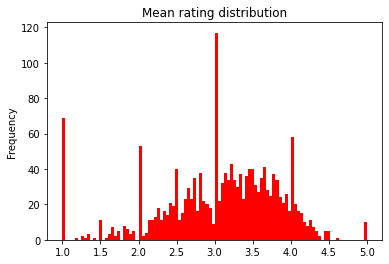

In [22]:
ratings_mean_count_df['mean'].plot(bins = 100, kind = 'hist', color = 'r')
plt.title('Mean rating distribution')

#### 5.2 rating count histogram

#### most movies receive rating at a number of near 10 or below

Text(0.5, 1.0, 'Rating count distribution')

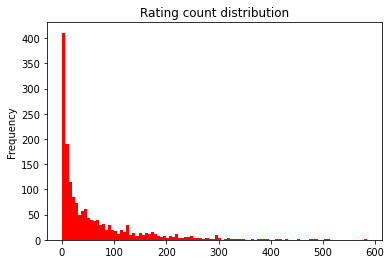

In [24]:
ratings_mean_count_df['count'].plot(bins = 100, kind = 'hist', color = 'r')
plt.title('Rating count distribution')

#### 5.3 Analyse 5 star rated movies

In [25]:
ratings_mean_count_df [ratings_mean_count_df['mean'] == 5]

,mean,count
title,,
Aiqing wansui (1994),5.0,1.0
Entertaining Angels: The Dorothy Day Story (1996),5.0,1.0
"Great Day in Harlem, A (1994)",5.0,1.0
Marlene Dietrich: Shadow and Light (1996),5.0,1.0
Prefontaine (1997),5.0,3.0
"Saint of Fort Washington, The (1993)",5.0,2.0
Santa with Muscles (1996),5.0,2.0
Someone Else's America (1995),5.0,1.0
Star Kid (1997),5.0,3.0


#### 5.4 Analyse movies rated most with mean rating

In [26]:
ratings_mean_count_df.sort_values('count', ascending = False).head(10)

,mean,count
title,,
Star Wars (1977),4.359589,584.0
Contact (1997),3.803536,509.0
Fargo (1996),4.155512,508.0
Return of the Jedi (1983),4.007890,507.0
Liar Liar (1997),3.156701,485.0
"English Patient, The (1996)",3.656965,481.0
Scream (1996),3.441423,478.0
Toy Story (1995),3.878319,452.0
Air Force One (1997),3.631090,431.0


#### 5.5 Analyse movies rated least with mean rating

In [27]:
ratings_mean_count_df.sort_values('count', ascending = False).tail(10)

,mean,count
title,,
Girl in the Cadillac (1995),1.0,1.0
He Walked by Night (1948),4.0,1.0
Hana-bi (1997),3.0,1.0
"Object of My Affection, The (1998)",4.0,1.0
Office Killer (1997),1.0,1.0
"Great Day in Harlem, A (1994)",5.0,1.0
"Other Voices, Other Rooms (1997)",3.0,1.0
Good Morning (1971),1.0,1.0
Girls Town (1996),3.0,1.0


### 6. Item-based collaborative filter
create a matrix with each row representing rating of each movie

In [28]:
user_id_movie_title_matrix = movie_rating_df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [30]:
user_id_movie_title_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 6.1 Analyse movies correlation (based on rating) with titanic

In [31]:
titanic = user_id_movie_title_matrix['Titanic (1997)'] 

In [32]:
titanic

user_id
0      NaN
1      NaN
2      5.0
3      NaN
4      NaN
      ... 
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 944, dtype: float64

In [33]:
titanic_correlation = pd.DataFrame(user_id_movie_title_matrix.corrwith(titanic), columns = ['Correlation'])

c:\users\kx764qe\anaconda3\envs\courses\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\kx764qe\anaconda3\envs\courses\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [34]:
titanic_correlation = titanic_correlation.join(ratings_mean_count_df['count'])

In [35]:
titanic_correlation.dropna(inplace = True)

#### Note below many correlated movies are not rated often

In [37]:
titanic_correlation.sort_values('Correlation', ascending = False).head(10)

,Correlation,count
title,,
"Newton Boys, The (1998)",1.0,4.0
"Pest, The (1997)",1.0,8.0
"Amazing Panda Adventure, The (1995)",1.0,10.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.0
Hideaway (1995),1.0,9.0
For Ever Mozart (1996),1.0,3.0
"Jerky Boys, The (1994)",1.0,3.0
Nadja (1994),1.0,8.0
Hearts and Minds (1996),1.0,5.0


#### 6.2 Analyse movies correlation (based on rating) with titanic ( movies with count > 80)

In [39]:
titanic_correlation[titanic_correlation['count'] > 80].sort_values('Correlation', ascending = False).head(10)

,Correlation,count
title,,
Titanic (1997),1.000000,350.0
"River Wild, The (1994)",0.497600,146.0
"Abyss, The (1989)",0.472103,151.0
Bram Stoker's Dracula (1992),0.443560,120.0
True Lies (1994),0.435104,208.0
William Shakespeare's Romeo and Juliet (1996),0.430243,106.0
"Last of the Mohicans, The (1992)",0.427239,128.0
Outbreak (1995),0.426237,104.0
Demolition Man (1993),0.411489,92.0


### 6.3 Create a filter using whole dataset

#### 6.3.1 create movie correlation with at least 80 counts of ratings per movie pair

In [40]:
movie_correlations = user_id_movie_title_matrix.corr(method = 'pearson', min_periods = 80)

In [42]:
movie_correlations.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 6.3.2 Read to-be-recommended user rating data

In [43]:
myRatings = pd.read_csv('My_Ratings.csv')

In [44]:
myRatings

,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1


#### 6.3.3  Weigh correlation with the rating

In [74]:
similar_movies_series = pd.Series(dtype='float64')

In [75]:
for i in range(0, 2):
    #--get the correlation for each movie
    similar_movies = movie_correlations[ myRatings['Movie Name'][i] ].dropna()
    
    #---scale the correlation with the rating of the current movie
    similar_movies = similar_movie.map(lambda x: x*myRatings['Ratings'][i])
    
    similar_movies_series = similar_movies_series.append(similar_movies)

In [76]:
similar_movies_series.sort_values(inplace = True, ascending = False)

#### 6.3.4  Top 10 recommendation

In [77]:
similar_movies_series.head(10)

Liar Liar (1997)                             25.000000
Con Air (1997)                               11.745705
Pretty Woman (1990)                          11.744755
Michael (1996)                               11.050550
Indiana Jones and the Last Crusade (1989)    10.360681
Top Gun (1986)                               10.143012
G.I. Jane (1997)                              9.948278
Multiplicity (1996)                           9.921509
Grumpier Old Men (1995)                       9.767471
Ghost and the Darkness, The (1996)            9.476880
dtype: float64